# ROC

In [9]:
%matplotlib inline

In [113]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [159]:
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=1)


model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

fpr1, tpr1, thresholds1 = roc_curve(y, model1.predict_proba(X)[:, 1])
fpr2, tpr2, thresholds1 = roc_curve(y, model2.predict_proba(X)[:, 1])


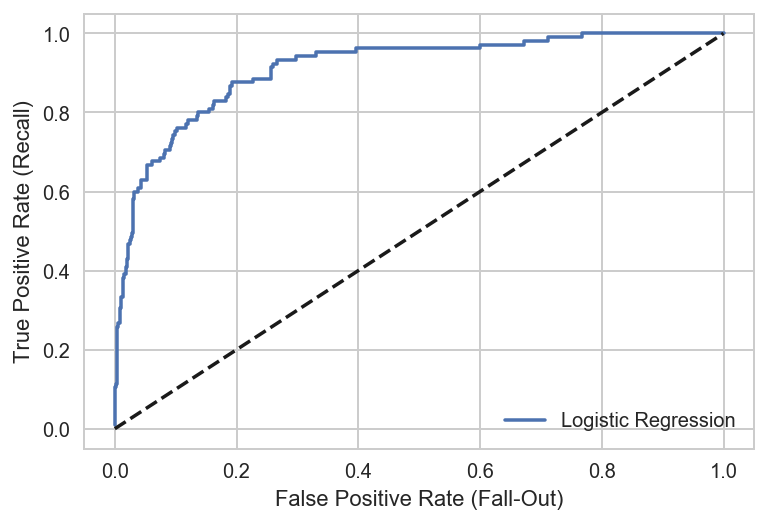

In [160]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
#plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)') 
plt.show()

In [161]:
y_score = model1.predict_proba(X)[:, 1]

In [162]:
def myroc(y_true, y_score):
 
    pos_label = 1.
    weight = 1.
   
    # make y_true a boolean vector
    y_true = (y_true == pos_label)
     
    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score )[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
     
    # y_score typically has many tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve.
    distinct_value_indices = np.where(np.diff(y_score))[0]
    
    #199개
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    #누적
    out = np.cumsum(y_true, axis=None, dtype=np.float64)
        
    # 누적값에서 중복없이 가져오기
    tps = out[threshold_idxs] 
    fps = 1 + threshold_idxs - tps
    thresholds = y_score[threshold_idxs]
    
#     optimal_idxs = np.where(np.r_[True,
#                                       np.logical_or(np.diff(fps, 2),
#                                                     np.diff(tps, 2)),
#                                       True])[0]
#     fps = fps[optimal_idxs]
#     tps = tps[optimal_idxs]
#     thresholds = thresholds[optimal_idxs]
    
#     tps = np.r_[0, tps]
#     fps = np.r_[0, fps]
    thresholds = np.r_[thresholds[0] + 1, thresholds]
    fpr = fps / fps[-1]
    tpr = tps / tps[-1]
     
    return fpr, tpr, thresholds

In [163]:
fpr, tpr, thresholds = myroc(y, y_score)

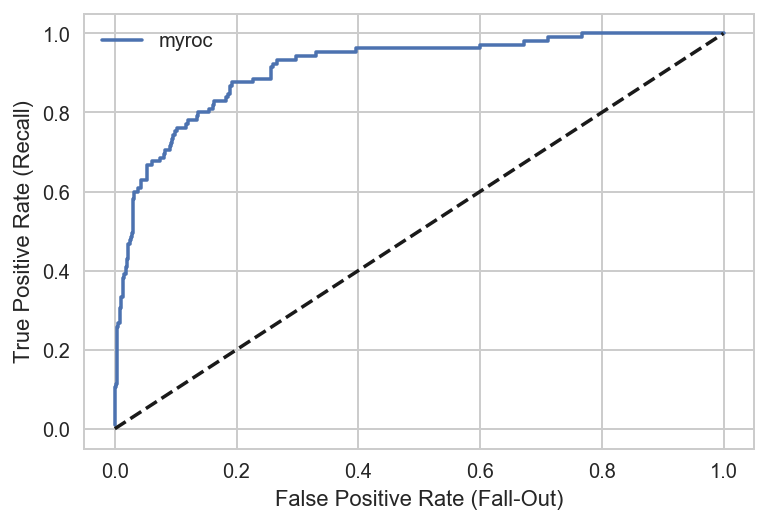

In [164]:
plt.plot(fpr, tpr, label="myroc") 
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)') 
plt.show()

|      | 사기 0 | 정상 1|
|------|------|------|
| 사기 0|   TP  | FN|
| 정상 1|  FP  | TN|

Recall, 재현율, 양성율(True Positive Rate; TPR) 
- TPR = 민감도 = 1 - 위음성율, true accept rate 
- 0인 케이스에 대해 0로 맞게 예측한 비율 
- ex) 암환자를 진찰해서 암이라고 진단 함 
- ex)  실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율. 검거율
- $ \dfrac{TP}{TP + FN} $


Fall-out, 위양성율 (False Positive Rate; FPR) 
- FPR = 1 - 특이도, false accept rate 
- 1인 케이스에 대해 0으로 잘못 예측한 비율 
- ex) 암환자가 아닌데 암이라고 진단 함 
- ex) 실제 정상 거래 중에서 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율
- $ \dfrac{FP}{FP + TN} $

In [165]:
recallist=[]
falloutlist=[] 

desc_score_indices = np.argsort(y_score )[::-1]
ys = y_score[desc_score_indices]
yt = y[desc_score_indices]
for p in ys:
    z = np.zeros(len(ys), dtype=int)
    z[ys < p] = 1
    
    filtered = z[yt==0]
    tp = len(filtered[filtered==0])
    fn = len(filtered[filtered==1])

    filtered = z[yt==1]
    fp = len(filtered[filtered==0])
    tn = len(filtered[filtered==1])

    recall = tp/(tp+fn)
    fallout = fp/(fp+tn)
    
    recallist.append(recall)
    falloutlist.append(fallout)
    
    #print(tp, fn, fp, tn)
    #print(recall, fallout)
    #break

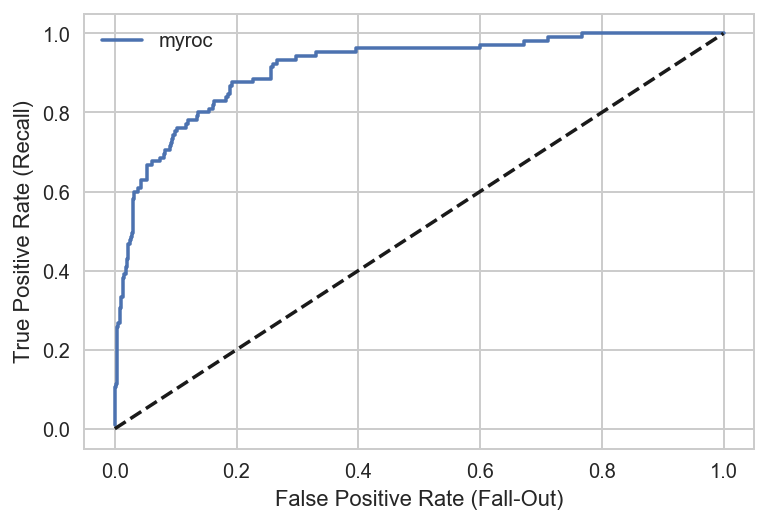

In [166]:
plt.plot(recallist, falloutlist, label="myroc") 
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)') 
plt.show()

In [167]:
from sklearn.metrics import auc
auc(recallist, falloutlist)

0.9120617185421654

In [168]:
np.trapz(falloutlist, recallist)

0.9120617185421654